Our implementation
BFGS            ==>  -0.040723 in [ -0.848456,  -0.605206] in 11 steps.


<Figure size 800x800 with 0 Axes>

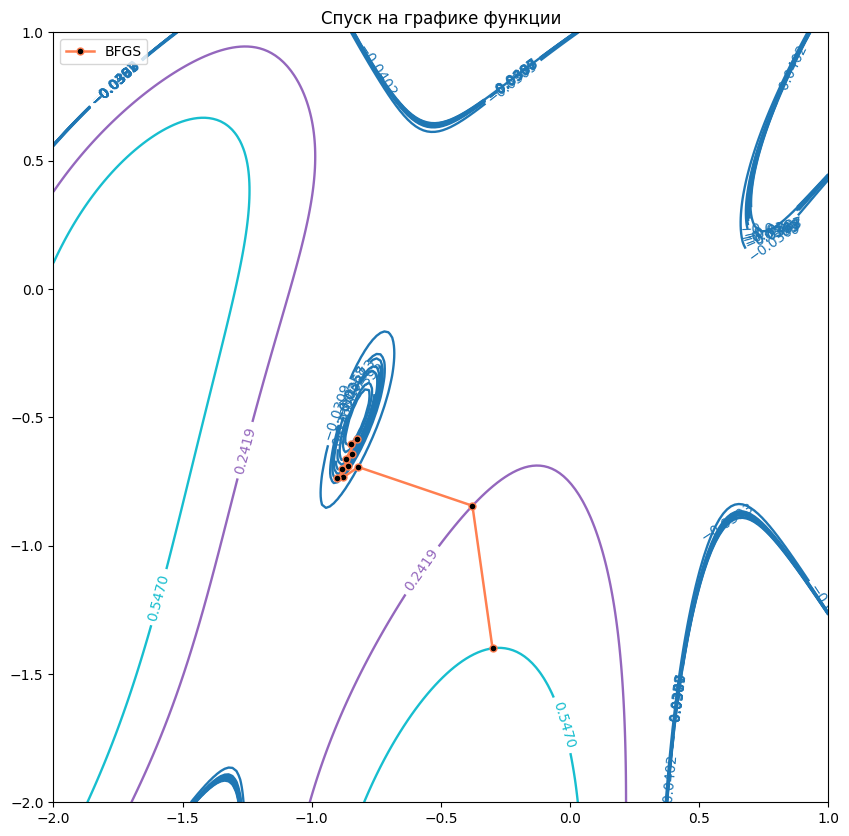

BFGS            ==>  -0.040723 in [ -0.848456,  -0.605206] in 11 steps.


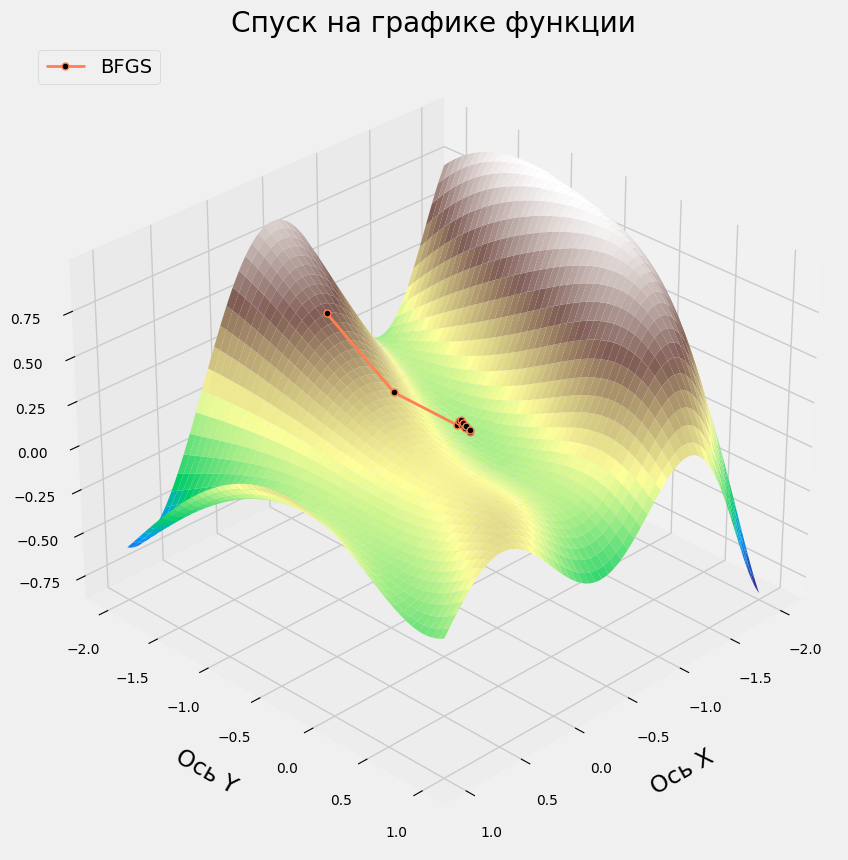

SciPy implementation
SciPy BFGS      ==>  -0.041983 in [ -0.822922,  -0.499418] in 11 steps.


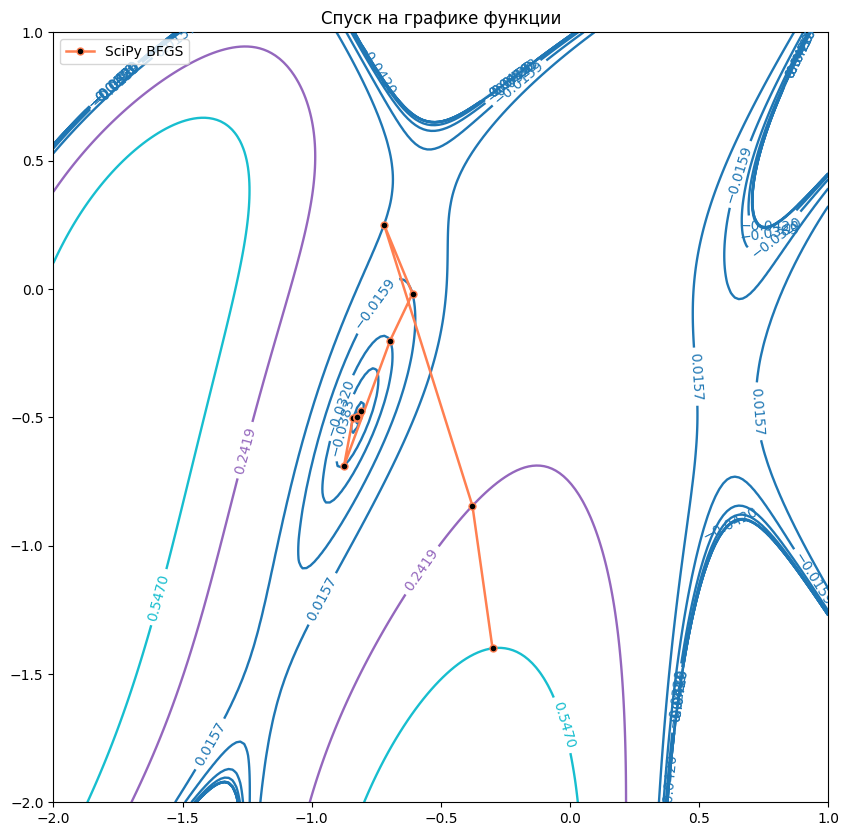

SciPy BFGS      ==>  -0.041983 in [ -0.822922,  -0.499418] in 11 steps.


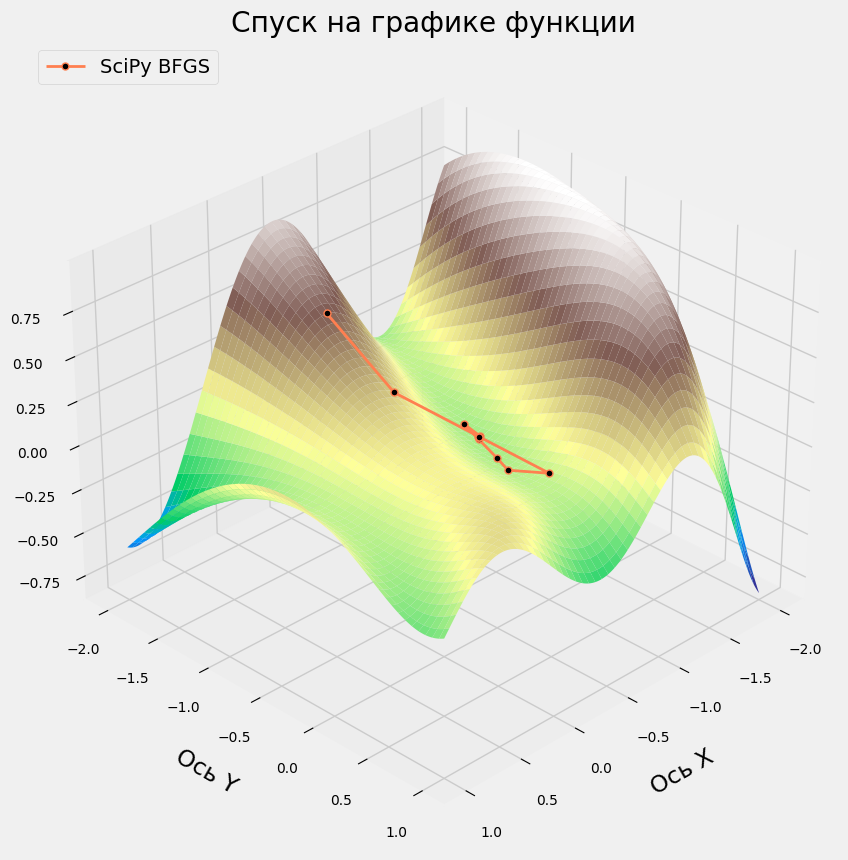

In [4]:
import sys
sys.path.append('../../')

from matplotlib import pyplot as plt
from scipy.optimize import *
import numpy as np
import helper


def grad(x, f, delta=1e-7):
    n = len(x)
    ans = np.zeros(n, dtype=float)
    params = x.copy()

    for j in range(n):
        params[j] += delta
        f_plus = f(params)
        params[j] -= delta
        params[j] -= delta
        f_minus = f(params)
        params[j] += delta
        ans[j] = np.divide(f_plus - f_minus, 2 * delta)

    return ans


def bfgs(initial_w, func, max_iter=1000, tolerance=1e-9, eps=1e-10):
    result = [np.copy(initial_w)]
    current_x = np.copy(initial_w)
    n = len(initial_w)
    H = np.identity(n)

    for i in range(max_iter):
        grad_f = grad(current_x, func)
        p = -1 * H @ grad_f
        alpha, _, _, _, _, _ = line_search(func, grad, current_x, p, args=(func, ))

        if alpha is None:
            alpha = 1e-3

        new_x = current_x + alpha * p
        new_grad_f = grad(new_x, func)

        y = new_grad_f - grad_f
        s = new_x - current_x

        rho = 1 / (y.T @ s + eps)
        H = (np.identity(n) - rho * y @ s.T) @ H @ (np.identity(n) - rho * y @ s.T) + rho * s @ s.T

        if np.linalg.norm(grad_f) < tolerance:
            break

        current_x = new_x
        result.append(current_x)

    return result


def f_lecture(x, _=None):
    return np.sin(0.5 * x[0] ** 2 - 0.25 * x[1] ** 2 + 3) * np.cos(2 * x[0] + 1 - np.exp(x[1]))

def f_himmelblau(x, _=None):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


_ = plt.figure(figsize=(8, 8))

initial_x = np.array([-0.3, -1.4])

x_lin = np.linspace(-2, 1, 200, dtype=float)
y_lin = np.linspace(-2, 1, 200, dtype=float)

helper.compare(f_lecture, initial_x, x_lin, y_lin, bfgs, 'BFGS', 'BFGS')

Our implementation
BFGS            ==>   0.000000 in [  3.000000,   2.000000] in 14 steps.


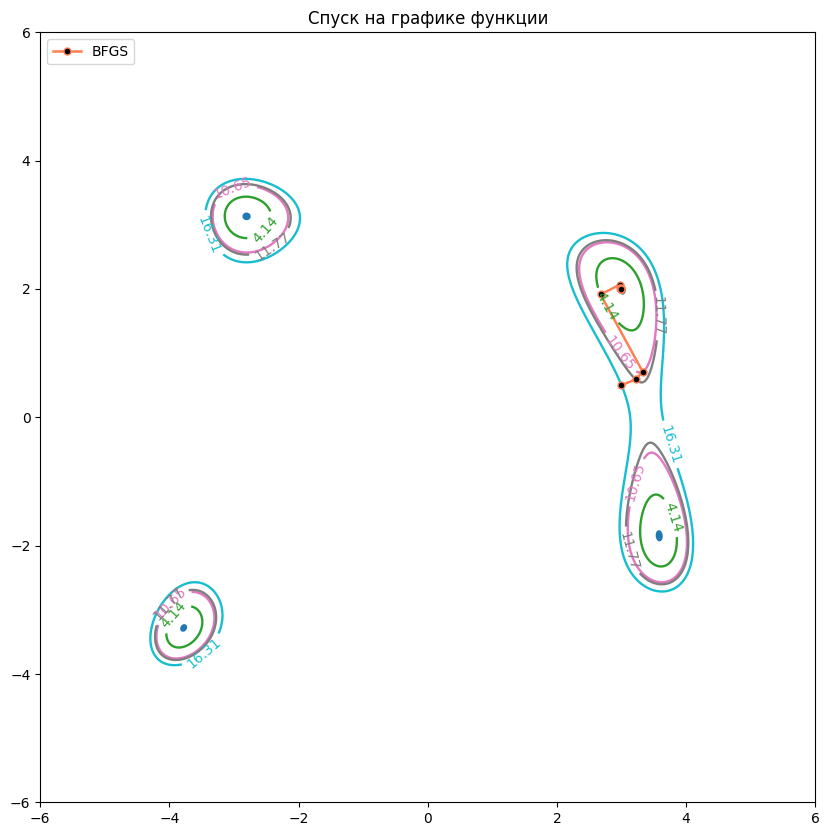

BFGS            ==>   0.000000 in [  3.000000,   2.000000] in 14 steps.


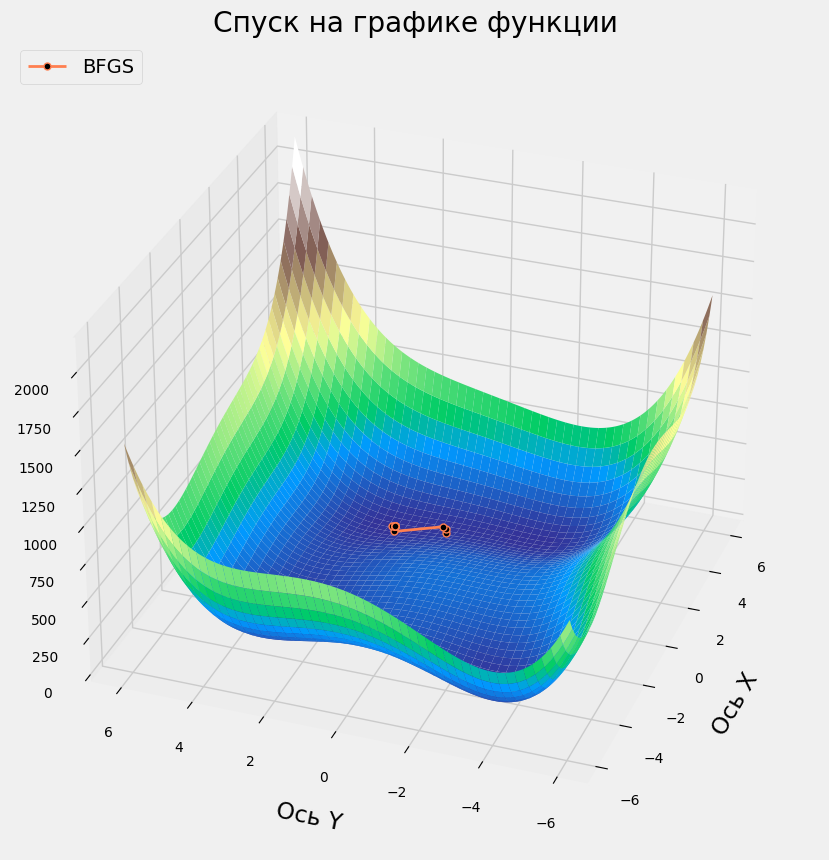

SciPy implementation
SciPy BFGS      ==>   0.000000 in [  3.000000,   2.000000] in 10 steps.


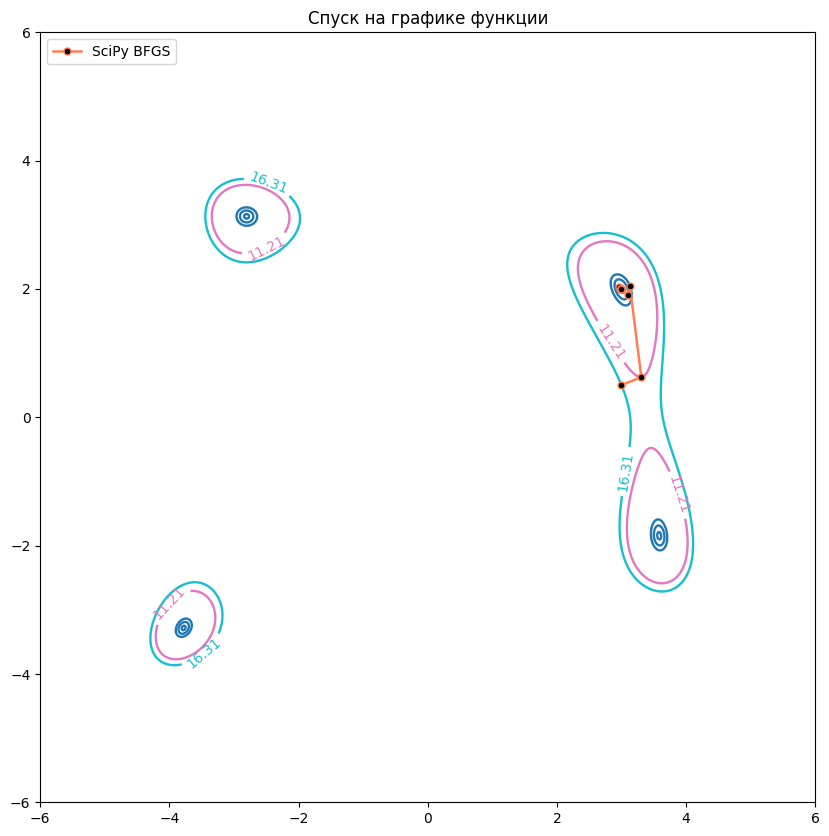

SciPy BFGS      ==>   0.000000 in [  3.000000,   2.000000] in 10 steps.


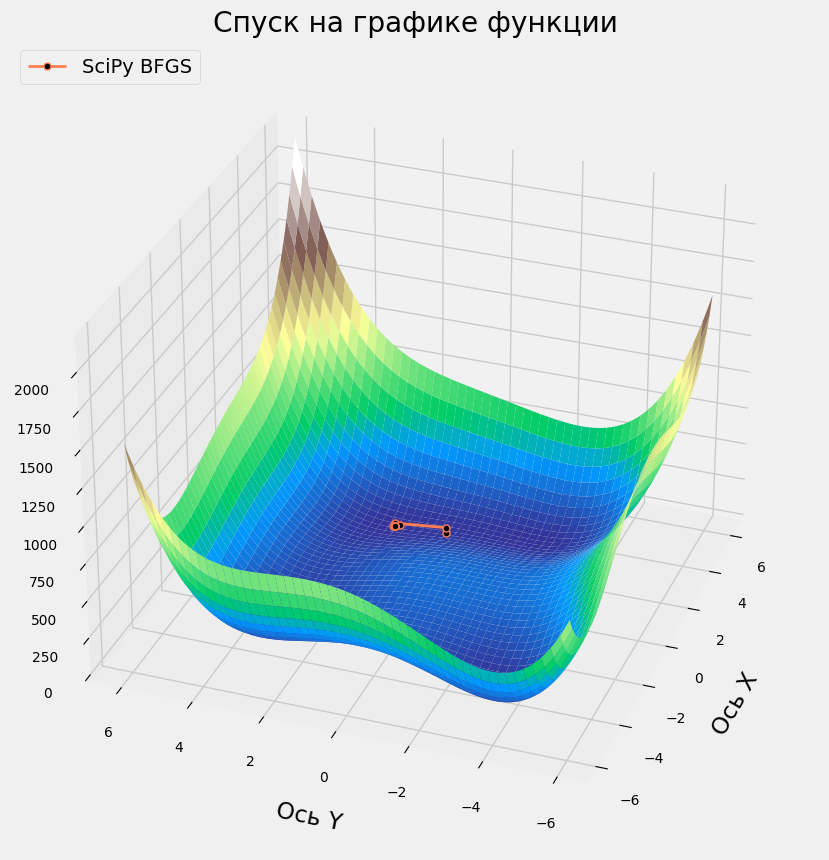

In [9]:
initial_x = np.array([3.0, 0.5])

x_lin = np.linspace(-6, 6, 1200, dtype=float)
y_lin = np.linspace(-6, 6, 1200, dtype=float)


helper.compare(f_himmelblau, initial_x, x_lin, y_lin, bfgs, 'BFGS', 'BFGS', max_iter=13, elev=(30, 30), azim=(200, 200))